# PIMA Indians Diabetes Database

---

#### - Download the PIMA Indians Diabetes Dataset from Kaggle
#### - Upload the dataset to your own Github
#### - Import the dataset using URL from your Github

---

#### Metadata
* Pregnancies: Number of times pregnant
* Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
* BloodPressure: Diastolic blood pressure (mm Hg)
* SkinThickness: Triceps skin fold thickness (mm)
* Insulin: 2-Hour serum insulin (mu U/ml)
* BMI: Body mass index (weight in kg/(height in m)^2)
* DiabetesPedigreeFunction: This feature represents a function that scores likelihood of diabetes based on family history.
* Age: The risk of developing diabetes increases with age. Older individuals are at a higher risk compared to younger individuals.
* Outcome: Class variable (0 or 1) 268 of 768 are 1, the others are 0


## Import Libraries







In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

# Import dataset

#### Display 10 sample rows from the dataset

In [ ]:
#1
df = pd.read_csv('https://raw.githubusercontent.com/AngelApriliaPutri/Data-Mining/refs/heads/main/diabetes.csv')
df.sample(10)

# Conclusion
# Import dataset dari github
# Memunculkan 10 sample data dari dataset

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
92             7       81             78             40       48  46.7   
591            2      112             78             50      140  39.4   
383            1       90             62             18       59  25.1   
403            9       72             78             25        0  31.6   
355            9      165             88              0        0  30.4   
238            9      164             84             21        0  30.8   
192            7      159             66              0        0  30.4   
414            0      138             60             35      167  34.6   
165            6      104             74             18      156  29.9   
148            5      147             78              0        0  33.7   

     DiabetesPedigreeFunction  Age  Outcome  
92                      0.261   42        0  
591                     0.175   24        0  
383                     1.268   25        0  
403                     0.280   38        0  
355                     0.302   49        1  
238                     0.831   32        1  
192                     0.383   36        1  
414                     0.534   21        1  
165                     0.722   41        1  
148                     0.218   65        0

# Exploratory Data Analysis

Display the info column and conclude what the insight is from that column

In [ ]:
#2
df.info()

# Ada 768 entri / baris di dalam Dataframe
# Index dari 0 sampai 767
# Total ada 9 kolom dalam Dataframe ini
# Kolom Pregnancies : ada 768 baris non-null dengan tipe data int64
# Kolom Glucose : ada 768 baris non-null dengan tipe data int64
# Kolom BloodPressure : ada 768 baris non-null dengan tipe data int64
# Kolom SkinThickness : ada 768 baris non-null dengan tipe data int64
# Kolom Insulin : ada 768 baris non-null dengan tipe data int64
# Kolom BMI : ada 768 baris non-null dengan tipe data float64
# Kolom DiabetesPedigreeFunction : ada 768 baris non-null dengan tipe data float64
# Kolom Age : ada 768 baris non-null dengan tipe data int64
# Kolom Outcome : ada 768 baris non-null dengan tipe data int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Show describe column and conclude what the insight is from that column

In [ ]:
#3
df.describe()

# Tabel ini merangkum statistik deskriptif kolom numerik : Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, dan Outcome
# Terdapat 768 nilai untuk setiap kolom
# Mean untuk Pregnancies (3.84), Glucose (120.89), BloodPressure (69.10), SkinThickness (20.53), Insulin (79.79), BMI (31.99), DiabetesPedigreeFunction (0.47), Age (33.24), Outcome (0.34)
# Standard deviation untuk Pregnancies (3.36), Glucose (31.97), BloodPressure (19.35), SkinThickness (15.95), Insulin (115.24), BMI (7.88), DiabetesPedigreeFunction (0.33), Age (11.78), Outcome (0.47)
# Min untuk setiap kolom 0
# 25% quartile 1 untuk Pregnancies (1), Glucose (99), BloodPressure (62), SkinThickness (0), Insulin (0), BMI (27.3), DiabetesPedigreeFunction (0.24), Age (24), Outcome (0)
# 50% median untuk Pregnancies (3), Glucose (117), BloodPressure (72), SkinThickness (23), Insulin (30.5), BMI (32), DiabetesPedigreeFunction (0.37), Age (29), Outcome (0)
# 75% quartile 3 untuk Pregnancies (6), Glucose (140.25), BloodPressure (80), SkinThickness (32), Insulin (127.25), BMI (36.6), DiabetesPedigreeFunction (0.62), Age (41), Outcome (1)
# Max untuk setiap kolom Pregnancies (17), Glucose (199), BloodPressure (122), SkinThickness (99), Insulin (846), BMI (67.1), DiabetesPedigreeFunction (2.42), Age (81), Outcome (1)

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

Null handling

In [ ]:
#3
df.isnull().sum()

# Pengecekkan nilai null atau NaN dan hasilnya tidak ada data yang null

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Create your own insightful visualization and explain it in at least 2 sentences

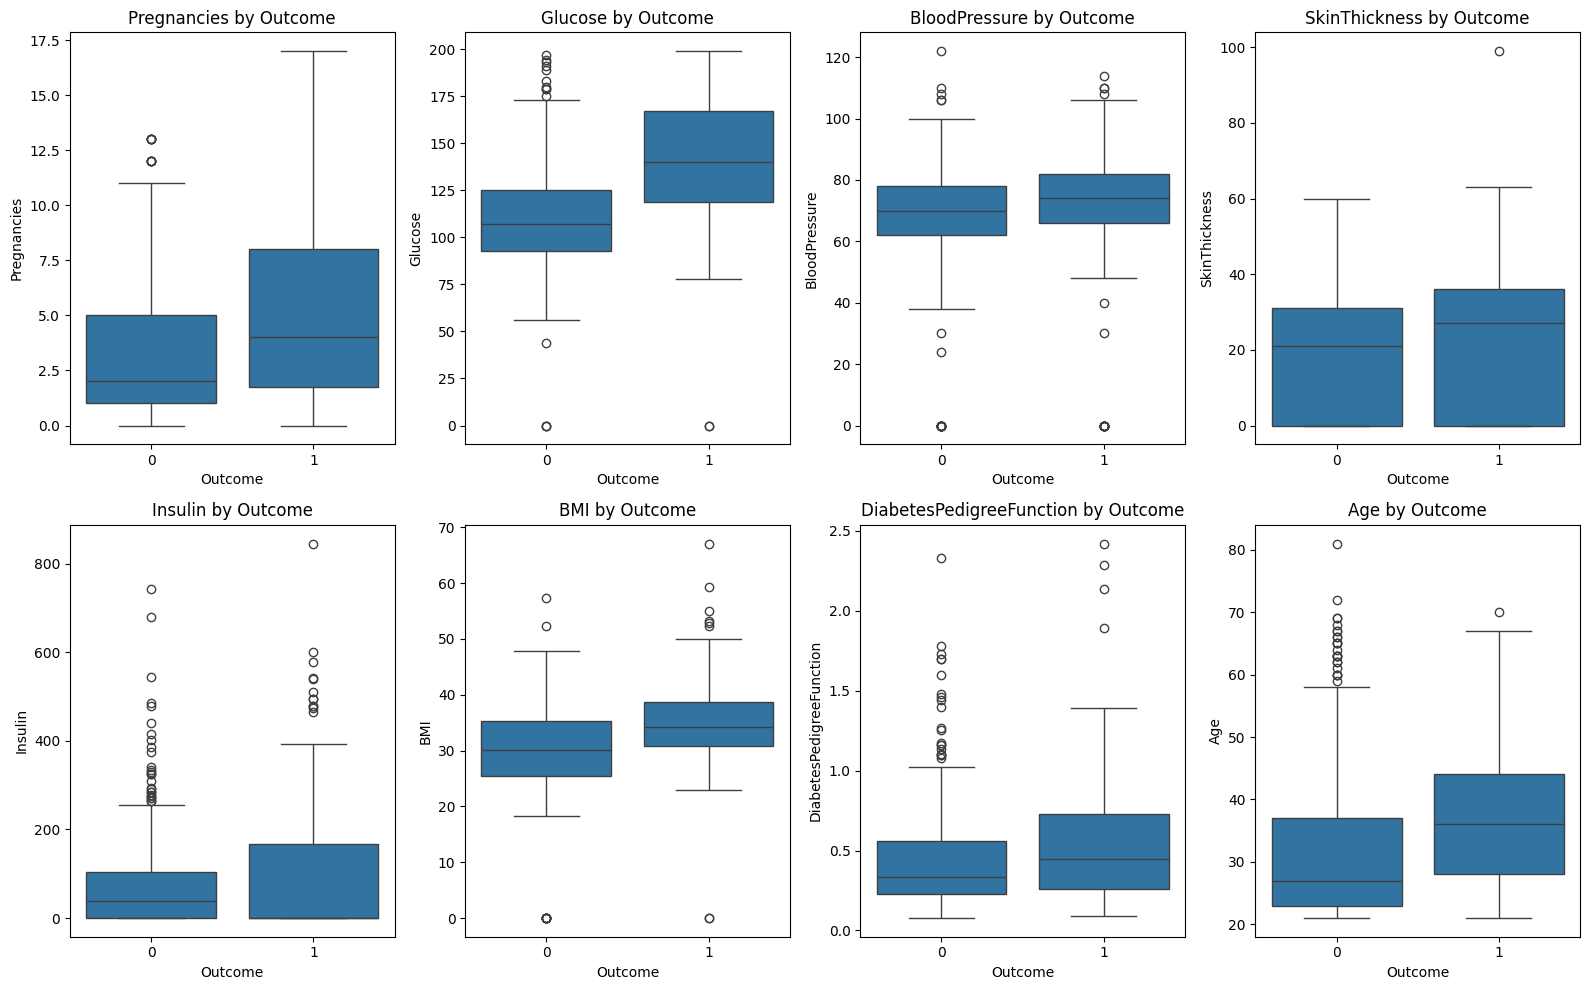

In [ ]:
# Membuat ukuran gambar besar dengan 2 baris dan 4 kolom
plt.figure(figsize=(16, 10))

# Box plot untuk Pregnancies
plt.subplot(2, 4, 1)
sns.boxplot(x='Outcome', y='Pregnancies', data=df)
plt.title('Pregnancies by Outcome')
plt.xlabel('Outcome')
plt.ylabel('Pregnancies')

# Box plot untuk Glucose
plt.subplot(2, 4, 2)
sns.boxplot(x='Outcome', y='Glucose', data=df)
plt.title('Glucose by Outcome')
plt.xlabel('Outcome')
plt.ylabel('Glucose')

# Box plot untuk BloodPressure
plt.subplot(2, 4, 3)
sns.boxplot(x='Outcome', y='BloodPressure', data=df)
plt.title('BloodPressure by Outcome')
plt.xlabel('Outcome')
plt.ylabel('BloodPressure')

# Box plot untuk SkinThickness
plt.subplot(2, 4, 4)
sns.boxplot(x='Outcome', y='SkinThickness', data=df)
plt.title('SkinThickness by Outcome')
plt.xlabel('Outcome')
plt.ylabel('SkinThickness')

# Box plot untuk Insulin
plt.subplot(2, 4, 5)
sns.boxplot(x='Outcome', y='Insulin', data=df)
plt.title('Insulin by Outcome')
plt.xlabel('Outcome')
plt.ylabel('Insulin')

# Box plot untuk BMI
plt.subplot(2, 4, 6)
sns.boxplot(x='Outcome', y='BMI', data=df)
plt.title('BMI by Outcome')
plt.xlabel('Outcome')
plt.ylabel('BMI')

# Box plot untuk DiabetesPedigreeFunction
plt.subplot(2, 4, 7)
sns.boxplot(x='Outcome', y='DiabetesPedigreeFunction', data=df)
plt.title('DiabetesPedigreeFunction by Outcome')
plt.xlabel('Outcome')
plt.ylabel('DiabetesPedigreeFunction')

# Box plot untuk Age
plt.subplot(2, 4, 8)
sns.boxplot(x='Outcome', y='Age', data=df)
plt.title('Age by Outcome')
plt.xlabel('Outcome')
plt.ylabel('Age')

plt.tight_layout()
plt.show()

# Conclusion
# Pregnancies by Outcome : Wanita dengan hasil positif(diabetes = 1) cenderung memiliki jumlah kehamilan yang lebih tinggi. Median dan distribusi jauh lebih tinggi dibandingkan yang tidak memiliki diabetes.
# Glucose by Outcome : Tingkat glukosa pada orang diabetes lebih tinggi dibanding yang tidak diabetes. Ada beberapa outlier untuk individu non-diabetes dengan glukosa tinggi.
# BloodPressure by Outcome : Tingkat tekanan darah relatif mirip pada kedua outcome, walaupun tekanan darah penderita diabetes sedikit lebih tinggi. Ada outlier pada kedua kasus.
# SkinThickness by Outcome : Distribusi ketebalan kulit terlihat mirip di kedua outcome, tanpa perbedaan besar pada median atau rentang distribusinya.
# Insulin by Outcome : Tingkat insulin umumnya lebih tinggi pada individu dengan diabetes, meskipun ada banyak outlier pada individu non-diabetes.
# BMI by Outcome : BMI sedikit lebih tinggi pada individu dengan diabetes, meskipun perbedaannya tidak terlalu mencolok dibandingkan dengan glukosa. Ada outlier pada kedua outcome, namun rentangnya menunjukkan sedikit perbedaan.
# DiabetesPedigreeFunction by Outcome : Individu dengan diabetes cenderung memiliki skor yang lebih tinggi, meskipun terdapat perbedaan dengan individu non-diabetes.
# Age by Outcome : Mereka yang memiliki diabetes memiliki rentang usia yang lebih luas, dan mediannya jelas lebih tinggi dibandingkan dengan mereka yang tidak memiliki diabetes.

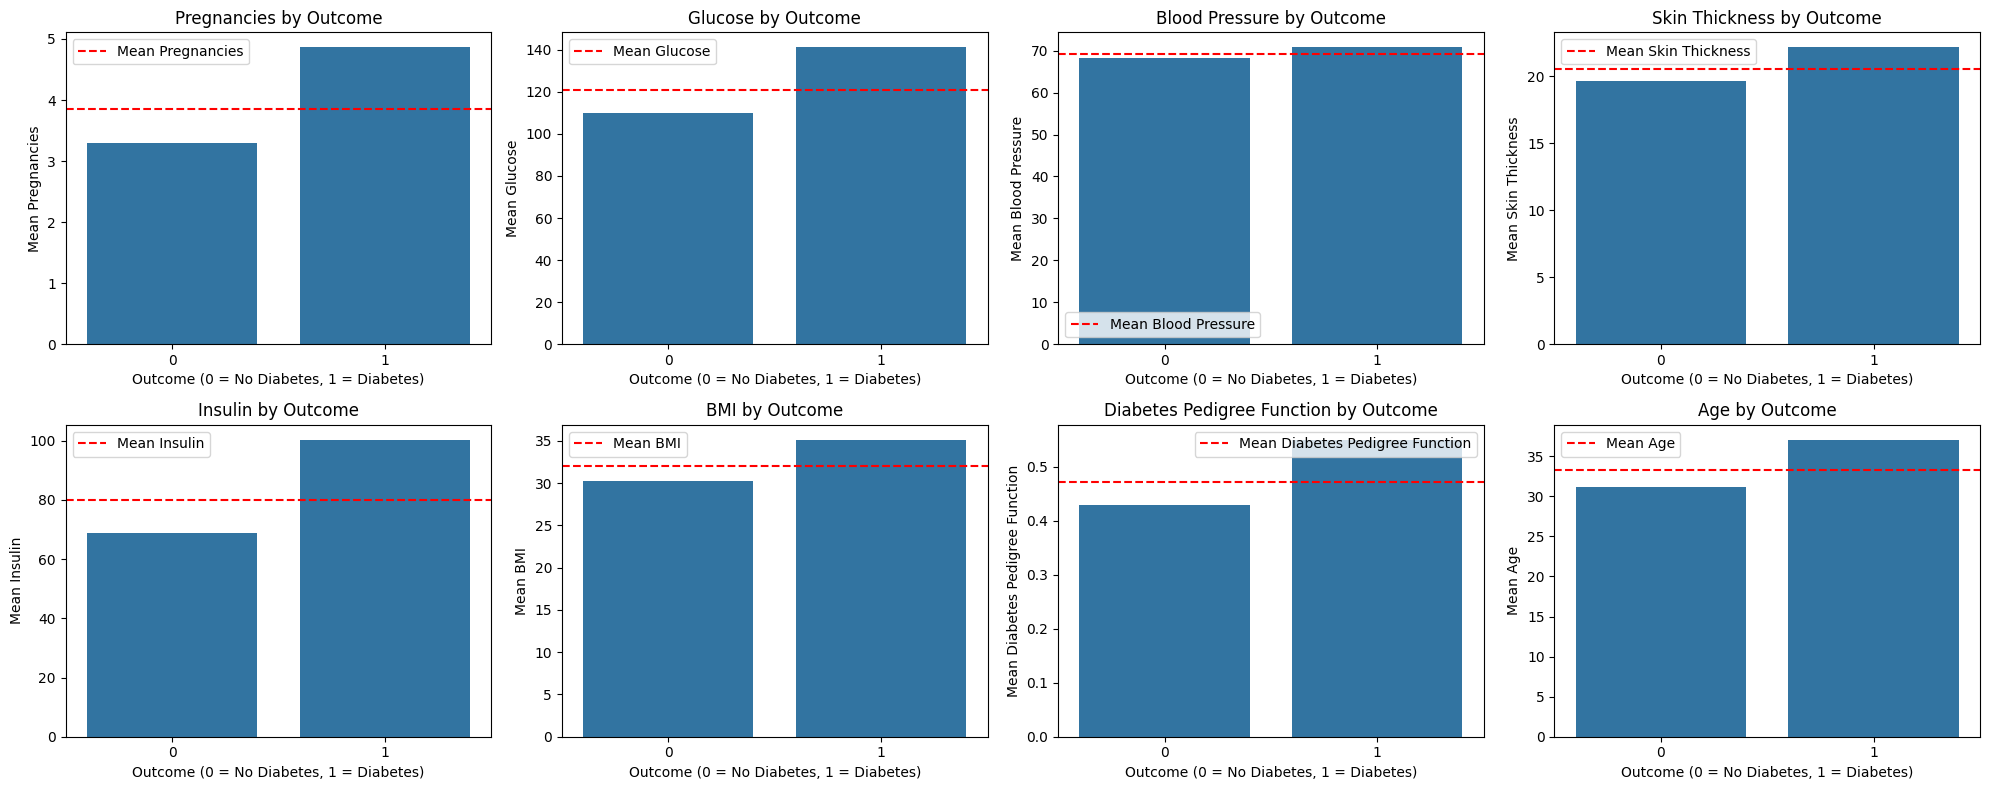

In [ ]:
# Membuat subplot dengan 2 baris dan 4 kolom
plt.figure(figsize=(20, 8))

# Bar chart untuk Pregnancies
plt.subplot(2, 4, 1)
sns.barplot(x='Outcome', y='Pregnancies', data=df, estimator='mean', errorbar=None)
mean_pregnancies = df['Pregnancies'].mean()
plt.axhline(mean_pregnancies, color='red', linestyle='--', label='Mean Pregnancies')
plt.title('Pregnancies by Outcome')
plt.xlabel('Outcome (0 = No Diabetes, 1 = Diabetes)')
plt.ylabel('Mean Pregnancies')
plt.legend()

# Bar chart untuk Glucose
plt.subplot(2, 4, 2)
sns.barplot(x='Outcome', y='Glucose', data=df, estimator='mean', errorbar=None)
mean_glucose = df['Glucose'].mean()
plt.axhline(mean_glucose, color='red', linestyle='--', label='Mean Glucose')
plt.title('Glucose by Outcome')
plt.xlabel('Outcome (0 = No Diabetes, 1 = Diabetes)')
plt.ylabel('Mean Glucose')
plt.legend()

# Bar chart untuk BloodPressure
plt.subplot(2, 4, 3)
sns.barplot(x='Outcome', y='BloodPressure', data=df, estimator='mean', errorbar=None)
mean_blood_pressure = df['BloodPressure'].mean()
plt.axhline(mean_blood_pressure, color='red', linestyle='--', label='Mean Blood Pressure')
plt.title('Blood Pressure by Outcome')
plt.xlabel('Outcome (0 = No Diabetes, 1 = Diabetes)')
plt.ylabel('Mean Blood Pressure')
plt.legend()

# Bar chart untuk SkinThickness
plt.subplot(2, 4, 4)
sns.barplot(x='Outcome', y='SkinThickness', data=df, estimator='mean', errorbar=None)
mean_skin_thickness = df['SkinThickness'].mean()
plt.axhline(mean_skin_thickness, color='red', linestyle='--', label='Mean Skin Thickness')
plt.title('Skin Thickness by Outcome')
plt.xlabel('Outcome (0 = No Diabetes, 1 = Diabetes)')
plt.ylabel('Mean Skin Thickness')
plt.legend()

# Bar chart untuk Insulin
plt.subplot(2, 4, 5)
sns.barplot(x='Outcome', y='Insulin', data=df, estimator='mean', errorbar=None)
mean_insulin = df['Insulin'].mean()
plt.axhline(mean_insulin, color='red', linestyle='--', label='Mean Insulin')
plt.title('Insulin by Outcome')
plt.xlabel('Outcome (0 = No Diabetes, 1 = Diabetes)')
plt.ylabel('Mean Insulin')
plt.legend()

# Bar chart untuk BMI
plt.subplot(2, 4, 6)
sns.barplot(x='Outcome', y='BMI', data=df, estimator='mean', errorbar=None)
mean_bmi = df['BMI'].mean()
plt.axhline(mean_bmi, color='red', linestyle='--', label='Mean BMI')
plt.title('BMI by Outcome')
plt.xlabel('Outcome (0 = No Diabetes, 1 = Diabetes)')
plt.ylabel('Mean BMI')
plt.legend()

# Bar chart untuk DiabetesPedigreeFunction
plt.subplot(2, 4, 7)
sns.barplot(x='Outcome', y='DiabetesPedigreeFunction', data=df, estimator='mean', errorbar=None)
mean_diabetes_pedigree = df['DiabetesPedigreeFunction'].mean()
plt.axhline(mean_diabetes_pedigree, color='red', linestyle='--', label='Mean Diabetes Pedigree Function')
plt.title('Diabetes Pedigree Function by Outcome')
plt.xlabel('Outcome (0 = No Diabetes, 1 = Diabetes)')
plt.ylabel('Mean Diabetes Pedigree Function')
plt.legend()

# Bar chart untuk Age
plt.subplot(2, 4, 8)
sns.barplot(x='Outcome', y='Age', data=df, estimator='mean', errorbar=None)
mean_age = df['Age'].mean()
plt.axhline(mean_age, color='red', linestyle='--', label='Mean Age')
plt.title('Age by Outcome')
plt.xlabel('Outcome (0 = No Diabetes, 1 = Diabetes)')
plt.ylabel('Mean Age')
plt.legend()

plt.tight_layout()  # Mengatur layout agar tidak overlap
plt.show()

# Conclusion
# Pregnancies by Outcome : Wanita yang menderita diabetes lebih tinggi dan melebihi rata-rata jumlah pregnancy.
# Glucose by Outcome : Glukosa untuk penderita diabetes lebih tinggi dan melebihi rata-rata glukosa.
# BloodPressure by Outcome : Tidak terlalu beda untuk kedua outcome dalam variable ini.
# SkinThickness by Outcome : Tidak terlalu beda untuk kedua outcome dalam variable ini.
# Insulin by Outcome : Insulin untuk penderita diabetes lebih tinggi dan melebihi rata-rata insulin.
# BMI by Outcome : BMI untuk penderita diabetes lebih tinggi dan melebihi rata-rata BMI.
# DiabetesPedigreeFunction by Outcome : DiabetesPedigreeFunction untuk penderita diabetes lebih tinggi dan melebihi rata-rata DiabetesPedigreeFunction.
# Age by Outcome : Age yang menderita diabetes lebih tinggi dan melebihi rata-rata Age.

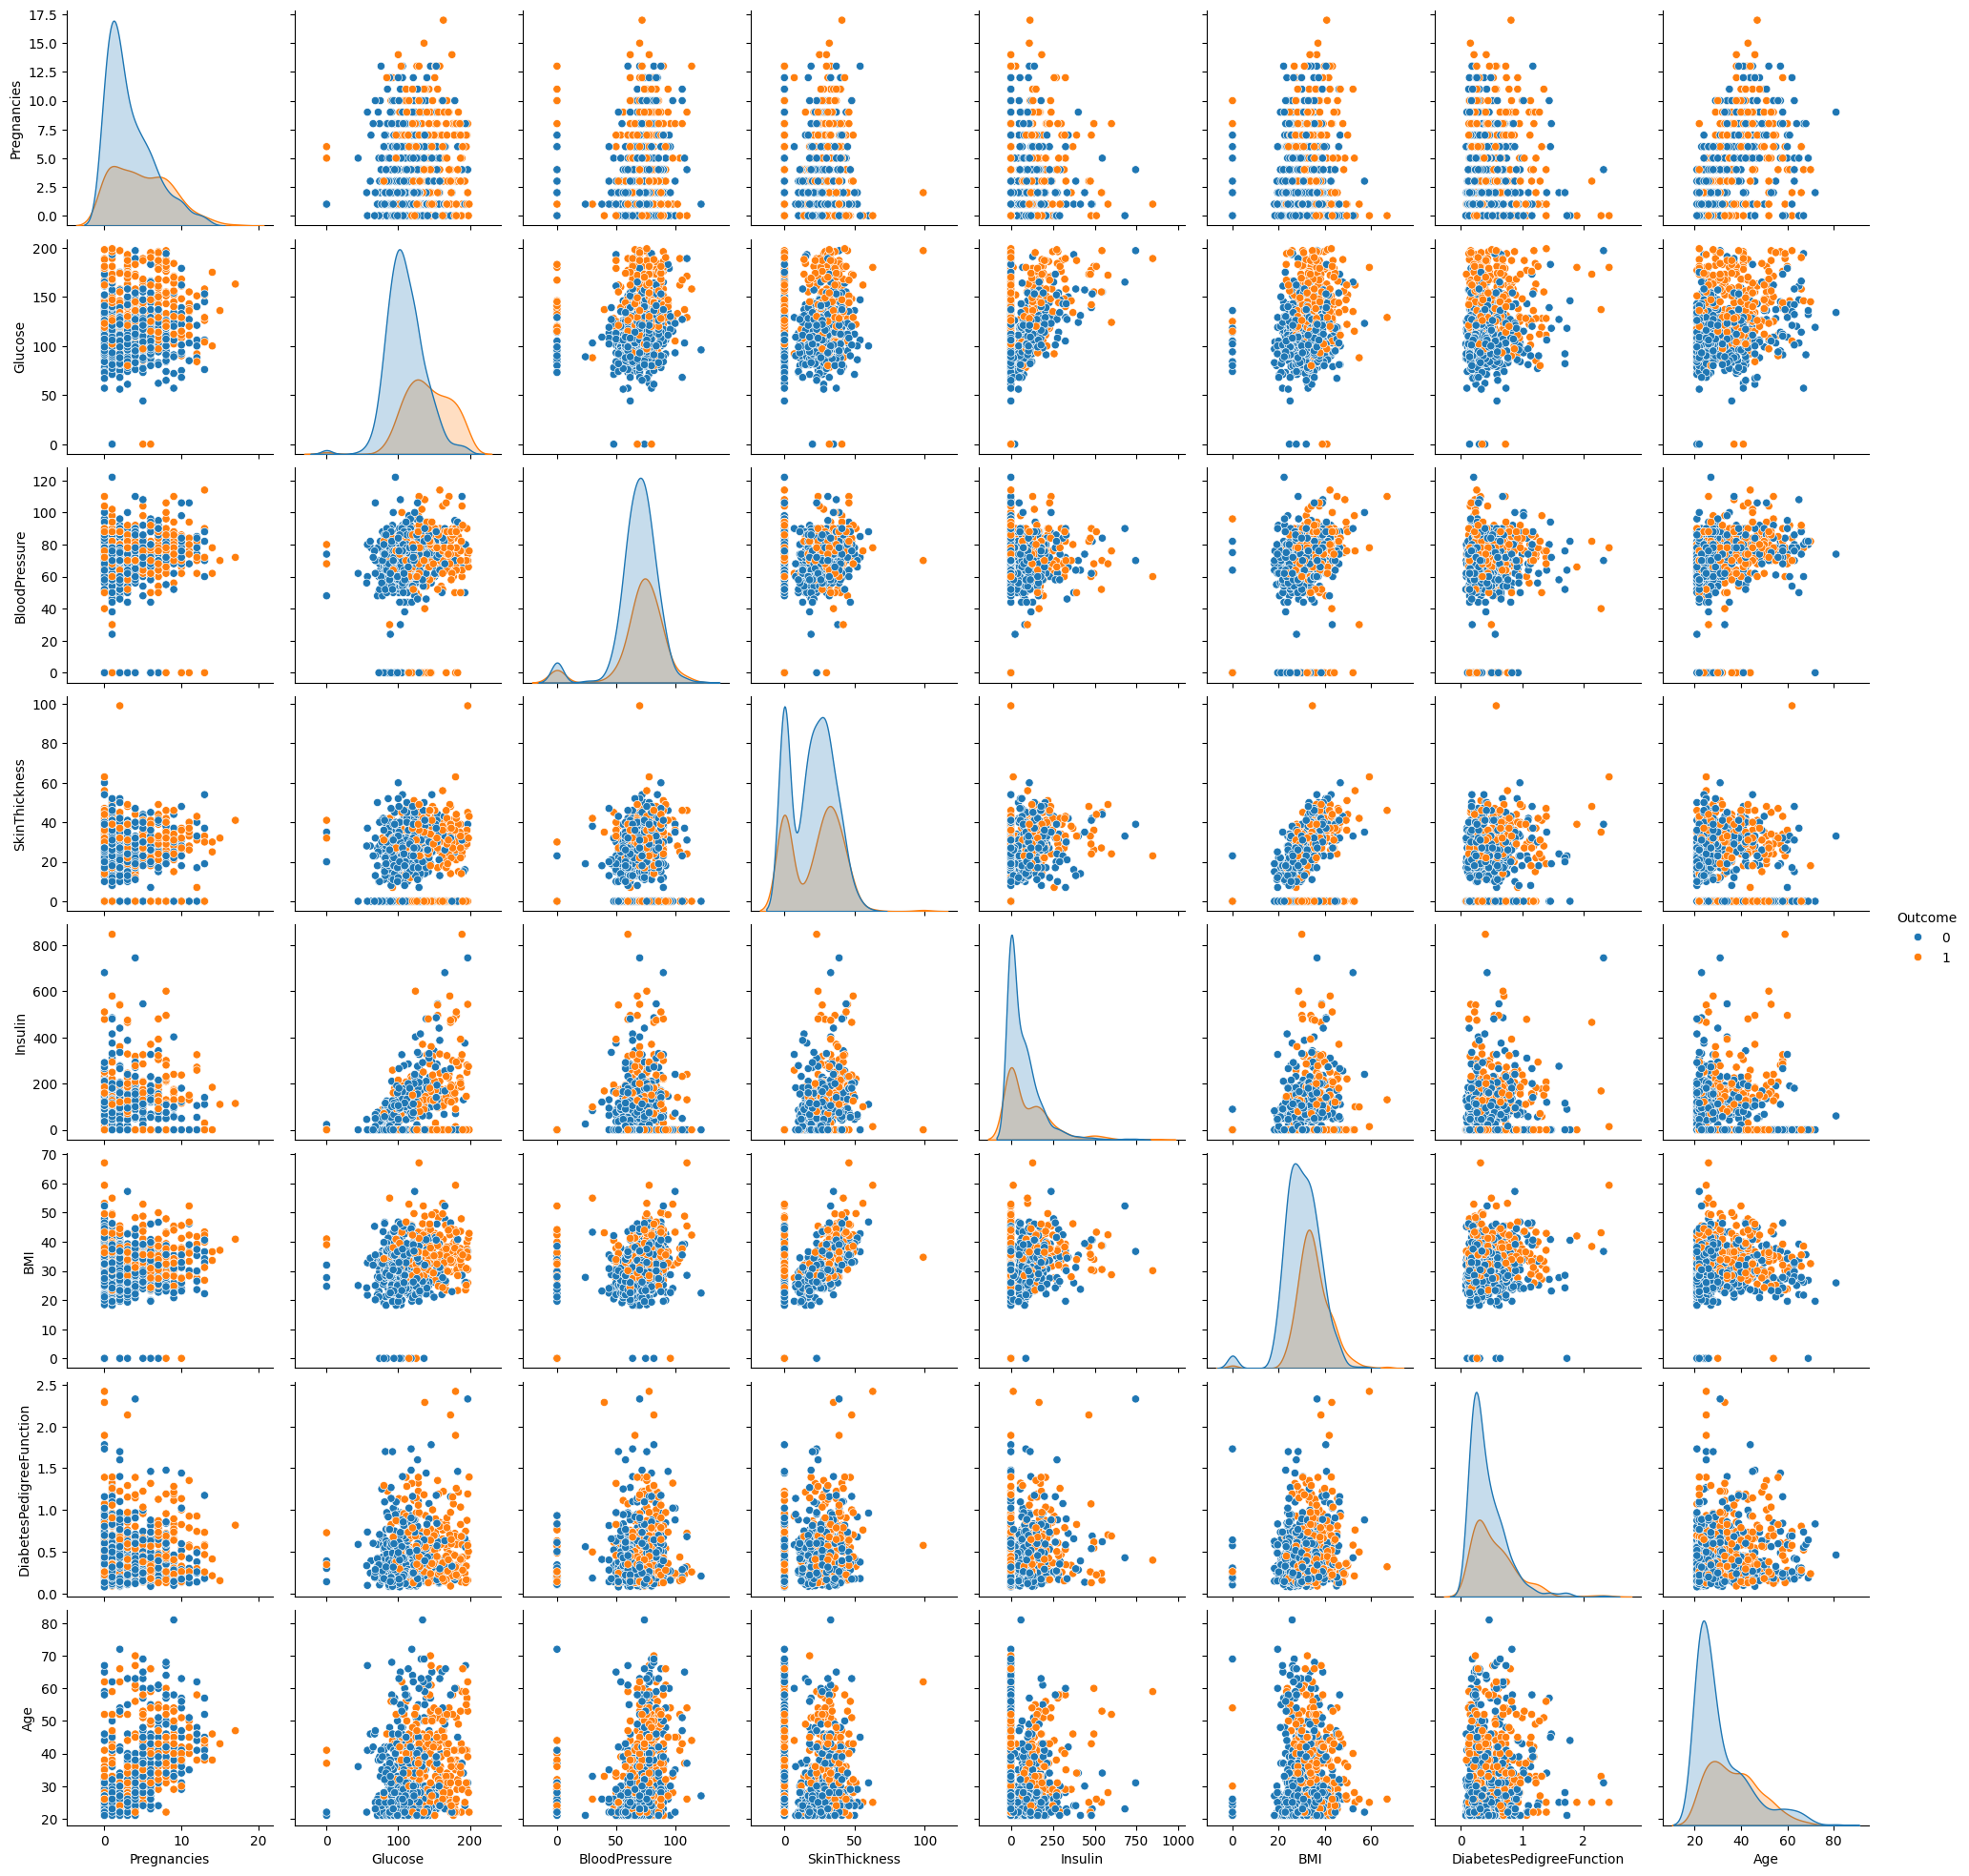

In [ ]:
sns.pairplot(df, hue='Outcome', diag_kind='kde')
plt.show()

# Code ini menghasilkan pair plot untuk dataset menggunakan library seaborn
# Membuat matriks scatter plot untuk setiap kombinasi variable dalam dataset, dengan warna titik yang ditentukan oleh kolom outcome.
# Ini memungkinkan visualisasi hubungan antar variable serta distribusi data berdasarkan hasil.

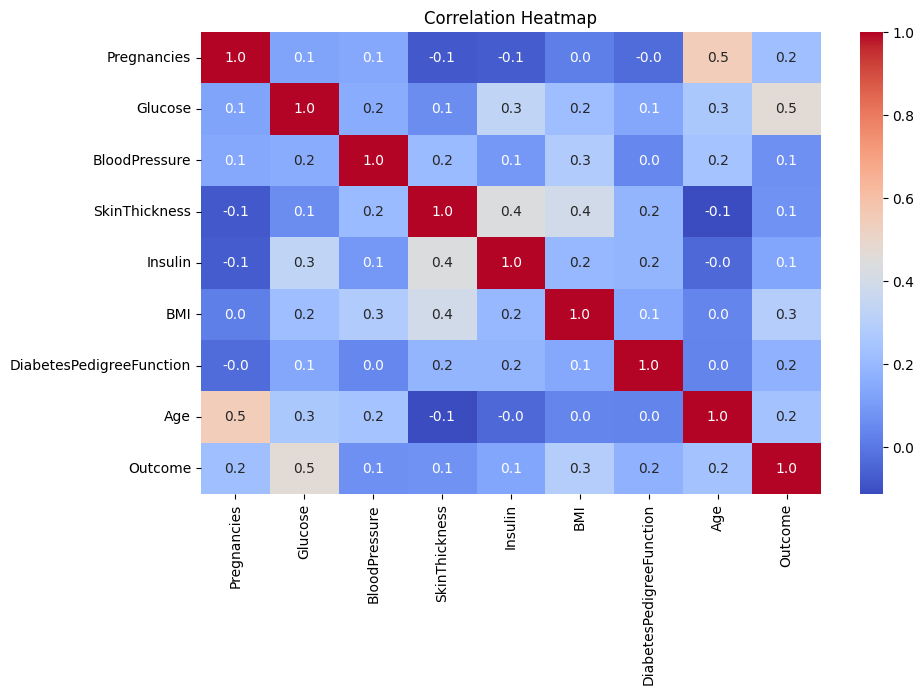

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".1f")
plt.title('Correlation Heatmap')
plt.show()

# Conclusion
# Beberapa info yang didapat:Pregnancies memiliki korelasi positif lemah dengan Glucose, BloodPressure, SkinThickness, dan Insulin.
# Glucose memiliki korelasi positif kuat dengan BloodPressure, SkinThickness, dan Insulin.
# Age memiliki korelasi positif kuat dengan Outcome.

# Machine Learning

1. Splitting X and y

In [ ]:
#1
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# X: Semua fitur (kolom) dalam dataset kecuali kolom outcome. Ini adalah variabel independen (fitur) yang akan digunakan untuk memprediksi.
# y: Kolom outcome, yang merupakan target atau label yang ingin diprediksi.

2. Split data into training and test set (test size 20% and random state 42) and check the shape of X_train and X_test

In [ ]:
#2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Data displit menjadi data train dan data test

In [ ]:
#3
X_train.shape, X_test.shape

# Menunjukkan jumlah baris (contoh data) dan jumlah kolom (fitur).

((614, 8), (154, 8))

# Desicion Tree

In [ ]:
#Criterion Entropy
#a
clf_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf_entropy.fit(X_train, y_train)

# Menciptakan objek clf_entropy sebagai model Decision Tree dengan kriteria pembagian yang ditentukan oleh entropy.
# Parameter random_state=42 digunakan untuk memastikan bahwa hasil yang diperoleh dapat dihasilkan di lain waktu dengan pengacakan yang konsisten.
# Melatih model Decision Tree menggunakan data pelatihan (X_train) dan labelnya (y_train).
# Proses ini mengajarkan model bagaimana mengklasifikasikan data berdasarkan fitur yang ada pada X_train.

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [ ]:
#b
y_pred_entropy = clf_entropy.predict(X_test)

# Menentukan label diabetes berdasarkan fitur yang ada di data pengujian.

In [ ]:
#c
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)
print("Model accuracy score with criterion entropy: " , accuracy_entropy)

# Fungsi ini membandingkan label yang sebenarnya (y_test) dengan prediksi yang dihasilkan oleh model (y_pred_entropy). Hasilnya adalah persentase prediksi yang benar dari total prediksi.
# Nilai 0.7207792207792207 menunjukkan bahwa model yang menggunakan kriteria entropy dapat memprediksi hasil dengan akurasi sekitar 72.08%. Ini berarti model berhasil mengklasifikasikan sekitar 72% dari data uji dengan benar.
# Akurasi 72.08% dapat dianggap sebagai hasil yang cukup baik.

Model accuracy score with criterion entropy:  0.7207792207792207


In [ ]:
#d
train_score = clf_entropy.score(X_train, y_train)
print(f"Training set score: {train_score:.4f}")

# Skor pada test set
test_score = clf_entropy.score(X_test, y_test)
print(f"Test set score: {test_score:.4f}")

# Training set score: 1.0000: Ini berarti model mencapai akurasi 100% pada data pelatihan, yang menunjukkan bahwa model berhasil mengklasifikasikan semua data pelatihan dengan benar.
# Test set score: 0.7208: Ini berarti model mencapai akurasi sekitar 72.08% pada data pengujian.

Training set score: 1.0000
Test set score: 0.7208


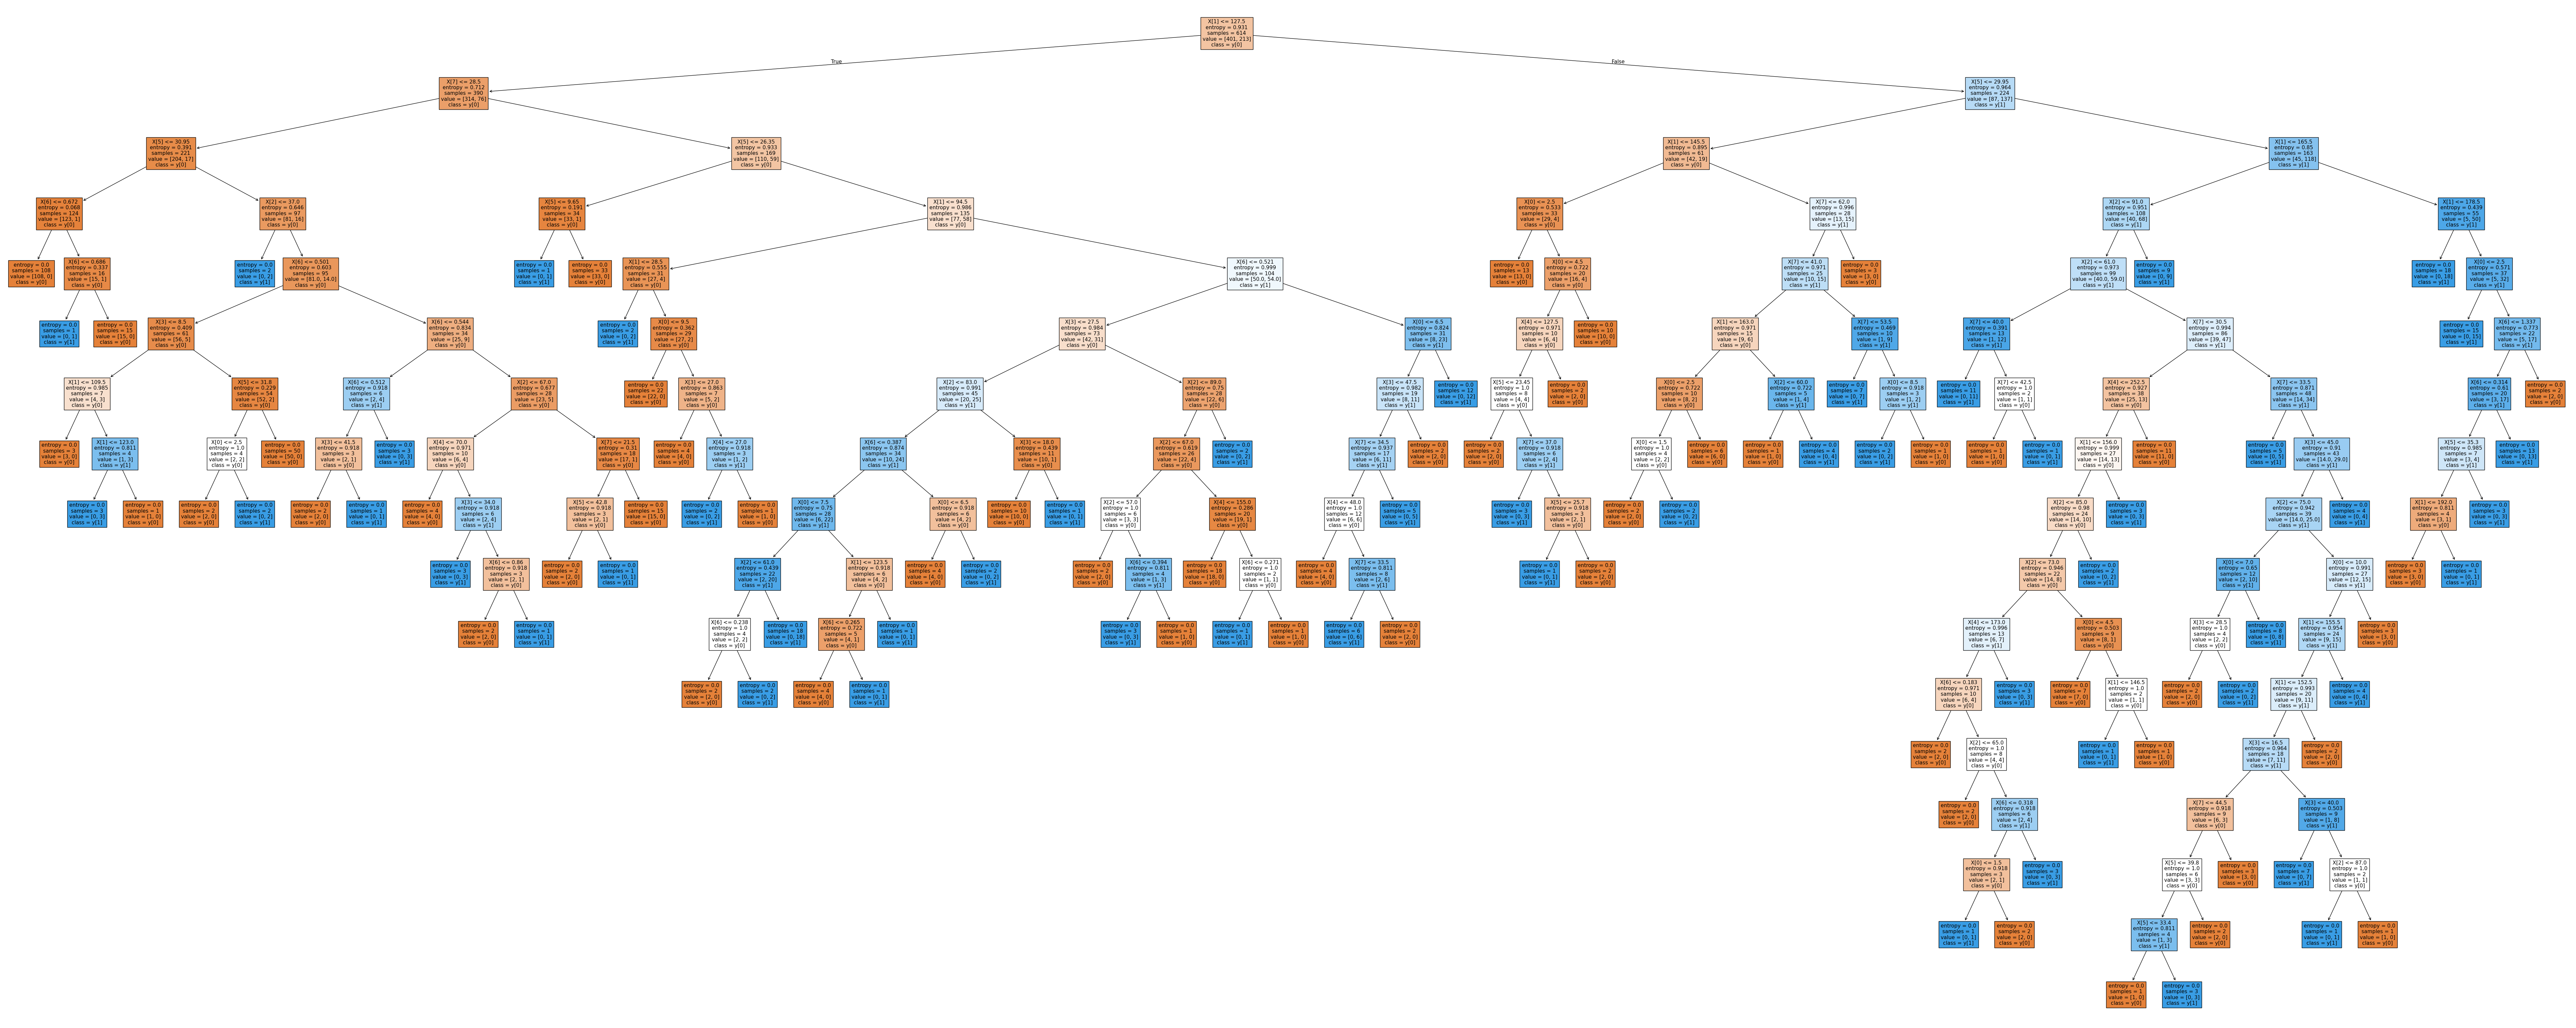

In [ ]:
#e
plt.figure(figsize=(100,40))
tree.plot_tree(clf_entropy, feature_names=[f"X[{i}]" for i in range(X.shape[1])], filled=True, class_names=True)
plt.show()

# Conclusion
# Node Akar (X[1] <= 127.5): Titik awal pemisahan, yang memeriksa apakah fitur X[1] atau Glucose kurang dari atau sama dengan 127.5.
# Entropy = 0.931 (menunjukkan tingkat ketidakpastian/keragaman data).
# Ada 614 sampel di node ini, terbagi dalam dua kelas: 401 sampel di kelas y[0], dan 213 sampel di kelas y[1], Kelas mayoritas di sini adalah y[0].

# Cabang Kiri (X[7] <= 28.5): Setelah memisahkan berdasarkan X[1] <= 127.5, cabang kiri memeriksa apakah X[7] atau Age kurang dari atau sama dengan 28.5.
# Entropy di node ini lebih rendah, yaitu 0.712.
# 390 sampel tersisa, mayoritas di kelas y[0] (314 sampel di y[0], dan 76 di y[1]). Cabang ini kemudian dipecah lagi berdasarkan X[5] <= 0.672.

#Cabang Kanan (X[5] <= 29.95):
# Jika X[1] lebih besar dari 127.5, maka data menuju ke cabang kanan.
# Entropy di sini lebih tinggi, yaitu 0.964, dengan 224 sampel yang mayoritas berada di kelas y[1] (137 sampel di y[1]).
# Cabang ini memeriksa lebih lanjut apakah X[5] <= 29.95, kemudian dibagi lagi berdasarkan X[1] dan X[1].

# Node:
# Setiap cabang pada akhirnya mencapai node daun, di mana entropy menjadi 0, artinya tidak ada lagi ketidakpastian, dan semua sampel di node tersebut termasuk dalam satu kelas tertentu.
# Inti dari model ini adalah bahwa Decision Tree membagi data menjadi kelompok-kelompok yang lebih kecil berdasarkan fitur-fitur tertentu, sampai mencapai titik di mana setiap kelompok memiliki klasifikasi yang jelas (entropy 0).
# Model ini menggunakan fitur-fitur seperti X[1], X[2], dan X[3] untuk memutuskan bagaimana membagi data dengan cara yang meminimalkan ketidakpastian atau keragaman di setiap cabang.

In [ ]:
#f
conf_matrix_entropy = confusion_matrix(y_test, y_pred_entropy)
print("Confusion Matrix (Entropy):")
print(conf_matrix_entropy)

# TP (True Positives): 76
# Jumlah prediksi positif yang benar (model memprediksi "diabetes" dan pasien sebenarnya memang memiliki diabetes).
# TN (True Negatives): 23
# Jumlah prediksi negatif yang benar (model memprediksi "tidak diabetes" dan pasien sebenarnya tidak memiliki diabetes).
# FP (False Positives): 20
# Jumlah prediksi positif yang salah (model memprediksi "diabetes" tetapi pasien sebenarnya tidak memiliki diabetes).
# FN (False Negatives): 35
# Jumlah prediksi negatif yang salah (model memprediksi "tidak diabetes" tetapi pasien sebenarnya memiliki diabetes).

Confusion Matrix (Entropy):
[[76 23]
 [20 35]]


In [ ]:
#g
class_report_entropy = classification_report(y_test, y_pred_entropy)
print("Classification Report (Entropy):")
print(class_report_entropy)

# Precision:
# Untuk kelas 0 (tidak diabetes): 0.79 : dari semua prediksi "tidak diabetes", 79% adalah benar.
# Untuk kelas 1 (diabetes): 0.60 : dari semua prediksi "diabetes", 60% adalah benar.

# Recall:
# Untuk kelas 0: 0.77 : dari semua pasien yang sebenarnya tidak diabetes, 77% terdeteksi dengan benar.
# Untuk kelas 1: 0.64 : dari semua pasien yang sebenarnya diabetes, 64% terdeteksi dengan benar.

# F1-Score:
# Untuk kelas 0: 0.78 : rata-rata harmonis dari presisi dan recall untuk kelas ini.
# Untuk kelas 1: 0.62 : Menunjukkan keseimbangan antara presisi dan recall untuk kelas diabetes.

# Support:
# Kelas 0 memiliki 99 contoh dalam data uji, sedangkan kelas 1 memiliki 55 contoh.

# Akurasi: 0.72 : Menunjukkan bahwa model benar dalam 72% kasus.

Classification Report (Entropy):
              precision    recall  f1-score   support

           0       0.79      0.77      0.78        99
           1       0.60      0.64      0.62        55

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154



# Naive Bayes

In [ ]:
#a
nb = GaussianNB()
nb.fit(X_train, y_train)

# Inisialisasi objek model Naive Bayes dengan distribusi Gaussian untuk fitur numerik.
# Melatih model pada data pelatihan (X_train sebagai fitur dan y_train sebagai target).
# Model akan belajar dari data ini untuk mengidentifikasi pola yang ada dan mempersiapkan diri untuk melakukan prediksi pada data baru.

GaussianNB()

In [ ]:
#b
y_pred_nb = nb.predict(X_test)

# Menentukan label spesies penguin berdasarkan fitur yang ada di data pengujian.

In [ ]:
#c
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Model accuracy score with Naive Bayes: " , accuracy_nb)

# Nilai 0.7662337662337663 menunjukkan bahwa model Naive Bayes berhasil memprediksi hasil dengan akurasi sekitar 76.62%.
# Model ini benar dalam mengklasifikasikan sekitar 76.62% dari data uji yang ada.

Model accuracy score with Naive Bayes:  0.7662337662337663


In [ ]:
#d
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
print("Confusion Matrix (Naive Bayes):")
print(conf_matrix_nb)

# 79: True Positive (kasus positif yang diprediksi dengan benar)
# 20: False Negative (kasus positif yang diprediksi sebagai negatif)
# 16: False Positive (kasus negatif yang diprediksi sebagai positif)
# 39: True Negative (kasus negatif yang diprediksi dengan benar)

NameError: name 'confusion_matrix' is not defined

In [ ]:
#e
class_report_nb = classification_report(y_test, y_pred_nb)
print("Classification Report (Naive Bayes):")
print(class_report_nb)

# Precision:
# Untuk kelas 0 (tidak diabetes): 0.83 : Dari semua prediksi bahwa pasien tidak memiliki diabetes, 83% benar-benar tidak memiliki diabetes.
# Untuk kelas 1 (diabetes): 0.66 : Dari semua prediksi bahwa pasien memiliki diabetes, 66% benar-benar memiliki diabetes.

# Recall:
# Untuk kelas 0: 0.80 : Dari semua pasien yang sebenarnya tidak memiliki diabetes, 80% terdeteksi dengan benar.
# Untuk kelas 1: 0.71 : Dari semua pasien yang sebenarnya memiliki diabetes, 71% terdeteksi dengan benar.

# F1-Score:
# Untuk kelas 0: 0.81 : Rata-rata harmonis dari precision dan recall untuk kelas ini.
# Untuk kelas 1: 0.68 : Menunjukkan keseimbangan antara precision dan recall untuk kelas diabetes.

# Support:
# Kelas 0 memiliki 99 contoh dalam data uji, sedangkan kelas 1 memiliki 55 contoh.

# Akurasi: 0.77 : Model memprediksi dengan benar 77% dari total data uji.

Classification Report (Naive Bayes):
              precision    recall  f1-score   support

           0       0.83      0.80      0.81        99
           1       0.66      0.71      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



# Logistic Regression

In [ ]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Scaler = MinMaxScaler() membuat objek scaler yang akan digunakan untuk menstandarkan data ke dalam rentang tertentu (default adalah [0, 1]).
# Menggunakan MinMaxScaler membantu memastikan semua fitur dalam dataset memiliki skala yang sama, yang dapat meningkatkan kinerja algoritma Machine Learning.

In [ ]:
# a
logreg = LogisticRegression(max_iter=200)
logreg.fit(X_train, y_train)

# Inisialisasi Model: model = LogisticRegression(max_iter=200) membuat objek model regresi logistik dengan parameter max_iter=200, yang berarti model akan melakukan maksimal 200 iterasi untuk mencapai konvergensi.
# Melatih Model: model.fit(X_train, y_train) melatih model menggunakan data fitur yang telah distandarkan (X_train) dan label target (y_train). Proses ini mengoptimalkan bobot model untuk meminimalkan kesalahan prediksi terhadap data pelatihan.

LogisticRegression(max_iter=200)

In [ ]:
# b
y_pred_logreg = logreg.predict(X_test)

# Menentukan label outcome berdasarkan fitur yang ada di data pengujian.

In [ ]:
# c
predictions = logreg.predict(X_test)
accuracy_log = accuracy_score(y_test, predictions)
print("Model accuracy score with Logistic: " , accuracy_log)

# Membuat Prediksi: predictions = logreg.predict(X_test) menggunakan model regresi logistik (logreg) untuk membuat prediksi pada data uji (X_test). \
# Hasilnya adalah array yang berisi label yang diprediksi untuk setiap contoh dalam X_test.

# Menghitung akurasi model dengan membandingkan label sebenarnya (y_test) dengan label yang diprediksi (predictions).
# Akurasinya adalah sekitar 0.747, yang berarti model memprediksi dengan benar sekitar 74.7% dari data uji.

Model accuracy score with Logistic:  0.7467532467532467


In [ ]:
#d
conf_matrix_log = confusion_matrix(y_test, y_pred_logreg)
print("Confusion Matrix (Logistic regression):")
print(conf_matrix_log)

# 78: True Positive (kasus positif yang diprediksi dengan benar)
# 21: False Negative (kasus positif yang diprediksi sebagai negatif)
# 18: False Positive (kasus negatif yang diprediksi sebagai positif)
# 37: True Negative (kasus negatif yang diprediksi dengan benar)

Confusion Matrix (Logistic regression):
[[78 21]
 [18 37]]


In [ ]:
#e
class_report_log = classification_report(y_test, y_pred_logreg)
print("Classification Report (Logistic Regression):")
print(class_report_log)

# Precision:
# Untuk kelas 0 (tidak diabetes): 0.81 : Dari semua prediksi bahwa pasien tidak memiliki diabetes, 81% benar-benar tidak memiliki diabetes.
# Untuk kelas 1 (diabetes): 0.64 : Dari semua prediksi bahwa pasien memiliki diabetes, 64% benar-benar memiliki diabetes.

# Recall:
# Untuk kelas 0: 0.79 : Dari semua pasien yang sebenarnya tidak memiliki diabetes, 79% terdeteksi dengan benar.
# Untuk kelas 1: 0.67 : Dari semua pasien yang sebenarnya memiliki diabetes, 67% terdeteksi dengan benar.

# F1-Score:
# Untuk kelas 0: 0.80 : Rata-rata harmonis dari precision dan recall untuk kelas ini.
# Untuk kelas 1: 0.65 : Menunjukkan keseimbangan antara precision dan recall untuk kelas diabetes.

# Support:
# Kelas 0 memiliki 99 contoh dalam data uji, sedangkan kelas 1 memiliki 55 contoh.

# Akurasi: 0.75 : Model memprediksi dengan benar 75% dari total data uji.

Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154

